In [12]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import sympy as sm
import func

In [32]:
sm.init_printing(use_unicode=True)

In [16]:
#valgmuligheder:
# andelen af mulig arbejdstid som bruges på forskning:
sr = sm.symbols('s_Rt')
# I starten antages kapitalopspsparingsraten at være konstant
sk = sm.symbols('s_Kt')

# Ud fra de valg nogle udfald
# Først defineres variable
l = sm.symbols('L_{t}')
alpha = sm.symbols('alpha')
k =sm.symbols('K_{t}')
k1 = sm.symbols('K_{t+1}')
y = sm.symbols('Y_{t}')
c = sm.symbols('C')
ct = sm.symbols('C_{t}')
a = sm.symbols('A_{t}')
a1 = sm.symbols('A_{t+1}')
r = sm.symbols('r')
l1  = sm.symbols('L_{t+1}')
n = sm.symbols('n')

#Greek:
rho = sm.symbols('rho')
beta = sm.symbols('beta')
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
delta = sm.symbols('delta')
lambd = sm.symbols('lambda')
theta = sm.symbols('theta')

t = sm.symbols('t')

# Functions:
uc = sm.Function('u')(ct) 
u = sm.Function('U')(c)

In [18]:
prod = sm.Eq(y,a*k**alpha*(l*(1-sr))**(1-alpha))

In [20]:
capakku = sm.Eq(k1,sk*y+(1-delta)*k)

In [22]:
research = sm.Eq(a1,a+rho*a**phi*(l*sr)**lambd)

In [24]:
popgrowth = sm.Eq(l1,(1+n)*l)

Model:

In [26]:
prod

In [27]:
capakku

In [29]:
research

In [31]:
popgrowth

also:

solving:

In [34]:
sm.init_printing(use_unicode=False)

# Nummerisk

In [91]:
# funktiions
def prod(a,k,l,sr,alpha):
    return k**alpha*(a*(1-sr)*l)**(1-alpha)
def capitalakku(a,k,l,sr,sk,alpha,delta):
    return prod(a,k,l,sr,alpha)*sk+(1-delta)*k
def research(a,sr,l,rho,phi):
    return a+rho*a**phi*(l*sr)**lambd

In [418]:
def solowwalk(k0,a0, l0, n, sr, sk, alpha, delta, rho, phi, t):
    k_path = np.array([k0])
    a_path = np.array([a0])
    l_path = [l0*(1+n)**i for i in list(range(t))]
    y_path = np.array([prod(a_path[0],k_path[0],l_path[0],sr,alpha)])
    
    for i in range(1,t):
        k_plus = capitalakku(a_path[i-1],k_path[i-1],l_path[i-1],sr,sk,alpha,delta)
        a_plus = research(a_path[i-1],sr,l_path[i-1],rho,phi)
        y_plus = prod(a_plus,k_plus,l_path[i-1],sr,alpha)
        
        k_path = np.append(k_path, k_plus)
        a_path = np.append(a_path, a_plus)
        y_path = np.append(y_path, y_plus)
        
    k_tilde_path = k_path/(a_path*l_path)   
    y_tilde_path = y_path/(a_path*l_path)                      
    return y_path, a_path, k_path, k_tilde_path, y_tilde_path

*** semi-endogen *** 

In [239]:
# parameters:
alpha = 1/3
delta = 0.05
rho = 0.9
phi = 0.1
lambd = 0.1
n=0.01

# fixed parameters
sr = 0.05
sk = 0.2

# starting values:
l0 = 100
k0 = 1000
a0 = 1000

In [241]:
t = 1000
y_path, a_path, k_path, k_tilde_path, y_tilde_path = solowwalk(k0,a0, l0, n, sr, sk, alpha, delta, rho, phi, t)

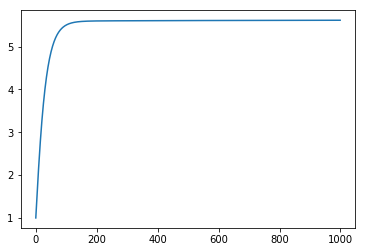

In [243]:
func.plot(range(t),k_tilde_path)

In [245]:
gse = (1+n)**(lambd/(1-phi))-1

In [247]:
# Predikteret k_tilde_ss:
(sk/(n+gse+delta+n*gse))**(1/(1-alpha))*(1-sr)

In [248]:
k_tilde_path[-1]

*** fuldt endogen ***

In [449]:
# parameters:
alpha = 1/3
delta = 0.05
rho = 0.05
phi = 1 #here 
lambd = 0.1
n = 0.00 # here

# fixed parameters
sr = 0.005
sk = 0.2

# starting values:
l0 = 10
k0 = 150
a0 = 10

In [451]:
t = 100
y_path, a_path, k_path, k_tilde_path,y_tilde_path = solowwalk(k0,a0, l0, n, sr, sk, alpha, delta, rho, phi, t)

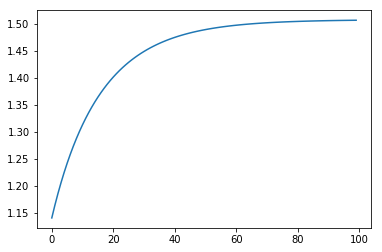

In [453]:
func.plot(range(t),y_tilde_path)

analytisk

In [455]:
ge = rho*(sr*l0)**lambd

In [457]:
k_tilde_path[-1]

In [459]:
# k_tilde
(sk/(ge+delta))**(1/(1-alpha))*(1-sr)

In [461]:
y_tilde_path[-1]

In [462]:
# y_tilde
(sk/(ge+delta))**(alpha/(1-alpha))*(1-sr)